# Data load

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sb
import copy
import random
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import scipy.stats as stats

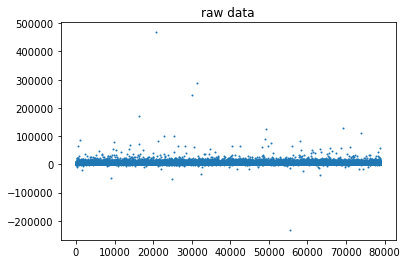

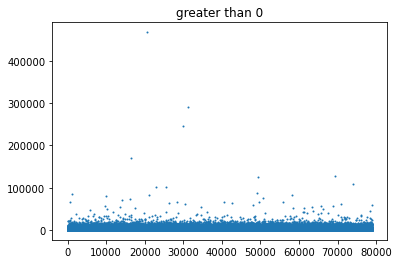

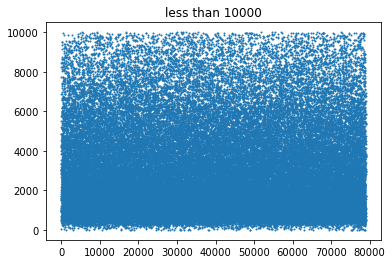

,income,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,460.000000,2005,1,3,1,2,1940,2,2,1,617,1,
1,1713.000000,2018,14,4,3,1,1939,5,1,2,,,9
2,2854.000000,2012,8,2,3,1,1967,6,3,1,510,1,
3,4290.000000,2011,7,4,5,1,1947,3,1,1,611,1,
4,1608.000000,2017,13,4,2,1,1940,2,1,2,,,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78923,5860.000000,2007,3,2,4,1,1965,5,1,2,941,5,
78924,3744.000000,2006,2,2,4,1,1972,5,1,1,512,2,
78925,2837.441215,2006,2,2,4,1,1941,2,1,2,,,7
78926,1697.000000,2018,14,7,1,2,1936,3,2,2,,,10


In [3]:
df = pd.read_csv('Kor_Income_training_data.csv')
df.head()
t1=df[['income','year','wave','region','family_member','gender','year_born','education_level','marriage','religion','occupation','company_size','reason_none_worker']]
t1.describe()
plt.scatter(t1.index,t1.income,s=1);plt.title('raw data');plt.show()
t1=t1[t1['income']>0 ]
plt.scatter(t1.index,t1.income,s=1);plt.title('greater than 0');plt.show()
t1=t1[t1['income']<10000 ]
plt.scatter(t1.index,t1.income,s=1);plt.title('less than 10000');plt.show()

t1

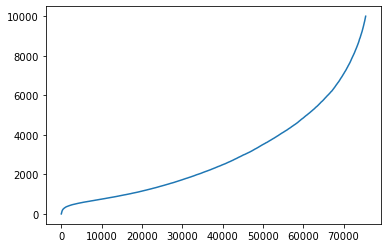

In [4]:
plt.plot(np.sort(t1['income']))
#plt.scatter(np.arange(1,78768,1),np.sort(target))
#target.shape
#target.describe()

# 데이터 파악하기

In [5]:
#year-year_born = age
t1['age']=t1['year']-t1['year_born']
t1.drop(columns =['year','year_born'],inplace=True)
t1

,income,wave,region,family_member,gender,education_level,marriage,religion,occupation,company_size,reason_none_worker,age
0,460.000000,1,3,1,2,2,2,1,617,1,,65
1,1713.000000,14,4,3,1,5,1,2,,,9,79
2,2854.000000,8,2,3,1,6,3,1,510,1,,45
3,4290.000000,7,4,5,1,3,1,1,611,1,,64
4,1608.000000,13,4,2,1,2,1,2,,,10,77
...,...,...,...,...,...,...,...,...,...,...,...,...
78923,5860.000000,3,2,4,1,5,1,2,941,5,,42
78924,3744.000000,2,2,4,1,5,1,1,512,2,,34
78925,2837.441215,2,2,4,1,2,1,2,,,7,65
78926,1697.000000,14,7,1,2,3,2,2,,,10,82


C:\Users\laugh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


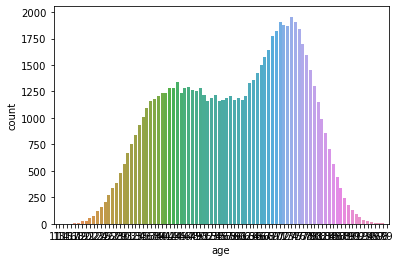

C:\Users\laugh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


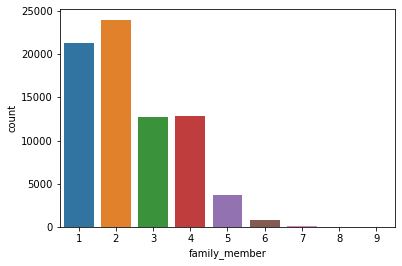

C:\Users\laugh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


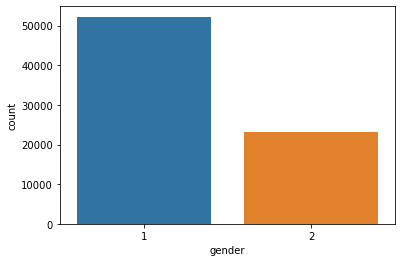

C:\Users\laugh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


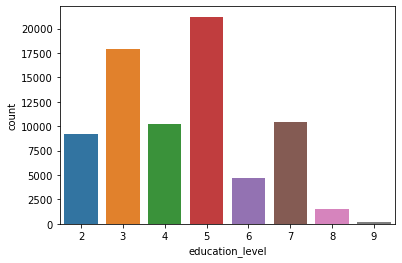

C:\Users\laugh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


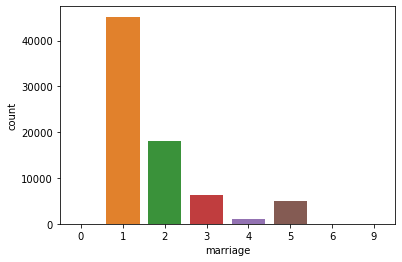

C:\Users\laugh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


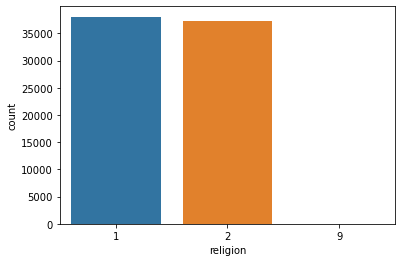

C:\Users\laugh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


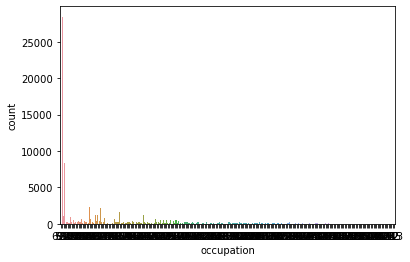

C:\Users\laugh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


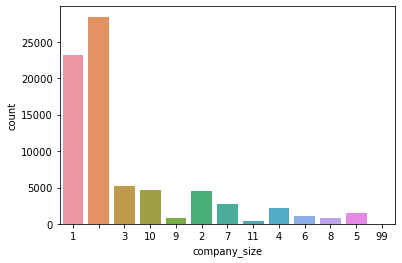

C:\Users\laugh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


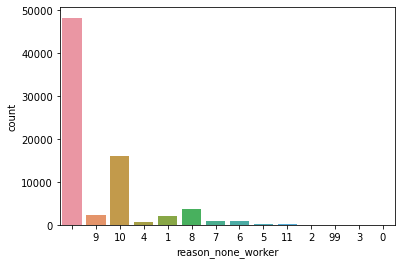

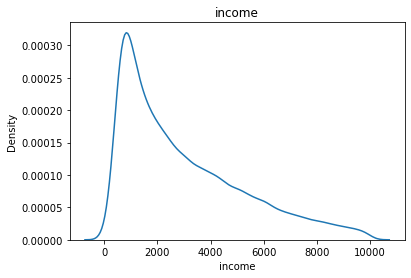

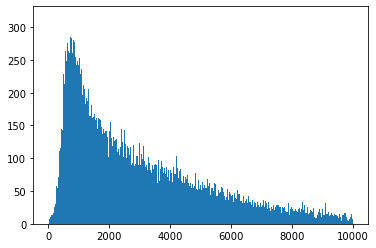

In [6]:
sb.countplot(t1.age);plt.show()
sb.countplot(t1.family_member);plt.show()
sb.countplot(t1.gender);plt.show()
sb.countplot(t1.education_level);plt.show()
sb.countplot(t1.marriage);plt.show()
sb.countplot(t1.religion);plt.show()
sb.countplot(t1.occupation);plt.show()
sb.countplot(t1.company_size);plt.show()
sb.countplot(t1.reason_none_worker);plt.show()

sb.kdeplot(t1.income); plt.title("income"); plt.show()
plt.hist(t1.income, bins=1000, label='bins=30');plt.show()


#sb.pairplot(t1)
#plt.title("ralation check")
#plt.show()

## 1. income

In [9]:
sum_by_wave=t1.groupby(['wave']).sum();sum_by_wave
count_by_wave=t1.groupby(['wave']).count();
mean_by_wave=sum_by_wave/count_by_wave;

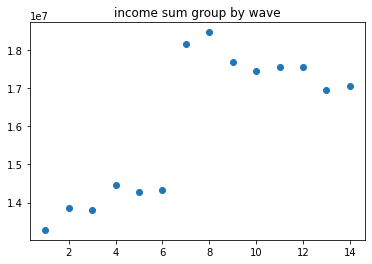

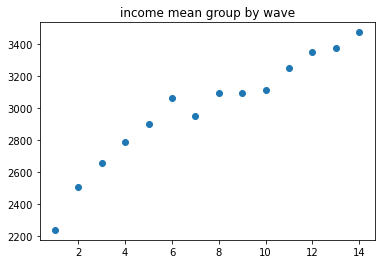

In [10]:
plt.scatter(sum_by_wave.index,sum_by_wave.income);plt.title("income sum group by wave");plt.show()
plt.scatter(mean_by_wave.index,mean_by_wave.income);plt.title("income mean group by wave");plt.show()

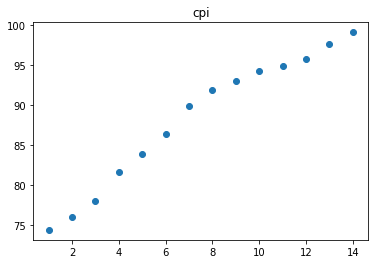

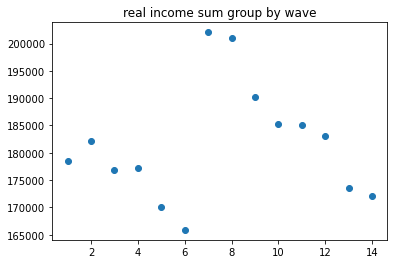

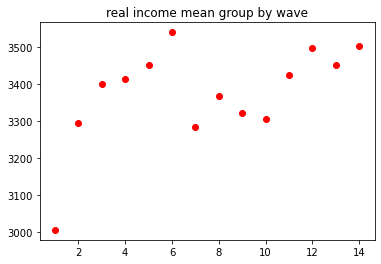

In [11]:
#income이 명목 수치 -> 실질 수치로 바꿔주려 cpi를 나눔
cpi= pd.read_csv('cpi.csv')
cpi=cpi.set_index(keys=np.arange(1,15,1))
plt.scatter(cpi.index,cpi.cpi);plt.title("cpi")
plt.show()


real_income_sum=sum_by_wave.income/cpi.cpi;

real_income_mean_by_wave=(mean_by_wave.income/cpi.cpi)*100;

plt.scatter(real_income_sum.index,real_income_sum);plt.title("real income sum group by wave")
plt.show()
plt.scatter(real_income_mean_by_wave.index, real_income_mean_by_wave,color='r');plt.title("real income mean group by wave")
plt.show()

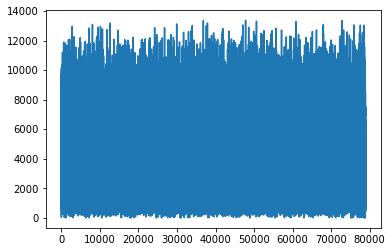

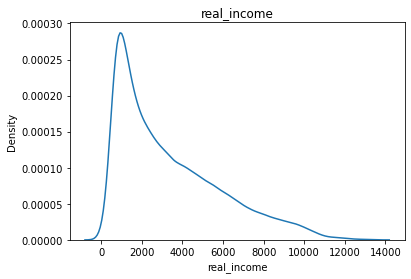

In [12]:
#real income 행 추가
t2=copy.deepcopy(t1)
t2['cpi_']=t2.wave
t2.cpi_.replace(np.arange(1,15,1),cpi.cpi, inplace=True)
t2['real_income']=t2['income']/t2['cpi_']*100
t2
plt.plot(t2.real_income);plt.show()
sb.kdeplot(t2.real_income); plt.title("real_income"); plt.show()

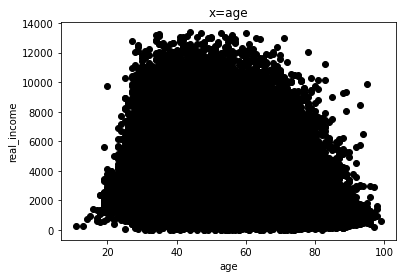

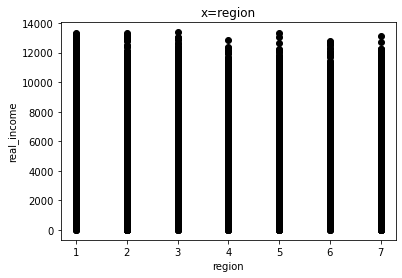

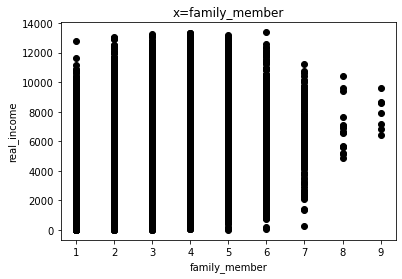

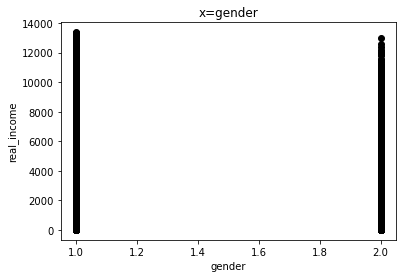

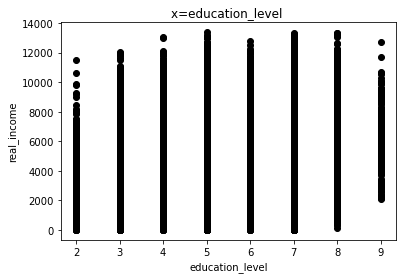

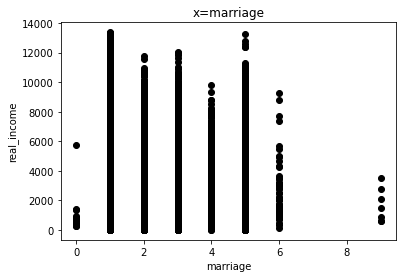

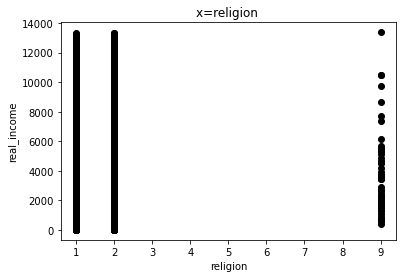

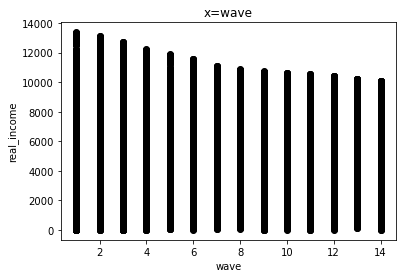

In [13]:
#income을 나눠보자
plt.scatter(t2.age,t2.real_income,color='black');plt.xlabel('age');plt.ylabel('real_income');plt.title("x=age");plt.show()
plt.scatter(t2.region,t2.real_income,color='black');plt.xlabel('region');plt.ylabel('real_income');plt.title("x=region");plt.show()
plt.scatter(t2.family_member,t2.real_income,color='black');plt.xlabel('family_member');plt.ylabel('real_income');plt.title("x=family_member");plt.show()
plt.scatter(t2.gender,t2.real_income,color='black');plt.xlabel('gender');plt.ylabel('real_income');plt.title("x=gender");plt.show()
plt.scatter(t2.education_level,t2.real_income,color='black');plt.xlabel('education_level');plt.ylabel('real_income');plt.title("x=education_level ");plt.show()
plt.scatter(t2.marriage,t2.real_income,color='black');plt.xlabel('marriage');plt.ylabel('real_income');plt.title("x=marriage");plt.show()
plt.scatter(t2.religion,t2.real_income,color='black');plt.xlabel('religion');plt.ylabel('real_income');plt.title("x=religion ");plt.show()
plt.scatter(t2.wave,t2.real_income,color='black');plt.xlabel('wave');plt.ylabel('real_income');plt.title("x=wave");plt.show()

## religion

C:\Users\laugh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


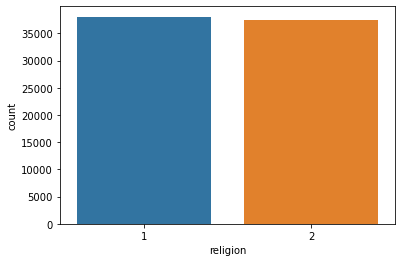

In [14]:
t2.religion.replace(9,2,inplace=True)
t2
sb.countplot(t2.religion);plt.show()

## marriage

C:\Users\laugh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


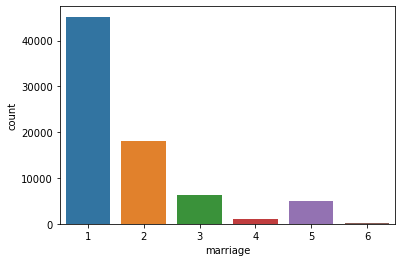

In [15]:
t2.marriage.replace(9,6,inplace=True)
t2.marriage.replace(0,6,inplace=True)
sb.countplot(t2.marriage);plt.show()

In [16]:
t3=copy.deepcopy(t2)
t3.occupation.replace(" ",0,inplace=True)
t3['occupation']=(t3.loc[:,['occupation']].astype(float)/100).round(0).astype(int)
t3

,income,wave,region,family_member,gender,education_level,marriage,religion,occupation,company_size,reason_none_worker,age,cpi_,real_income
0,460.000000,1,3,1,2,2,2,1,6,1,,65,74.413,618.171556
1,1713.000000,14,4,3,1,5,1,2,0,,9,79,99.086,1728.801243
2,2854.000000,8,2,3,1,6,3,1,5,1,,45,91.815,3108.424549
3,4290.000000,7,4,5,1,3,1,1,6,1,,64,89.850,4774.624374
4,1608.000000,13,4,2,1,2,1,2,0,,10,77,97.645,1646.781709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78923,5860.000000,3,2,4,1,5,1,2,9,5,,42,78.010,7511.857454
78924,3744.000000,2,2,4,1,5,1,1,5,2,,34,76.081,4921.070964
78925,2837.441215,2,2,4,1,2,1,2,0,,7,65,76.081,3729.500421
78926,1697.000000,14,7,1,2,3,2,2,0,,10,82,99.086,1712.653654


C:\Users\laugh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


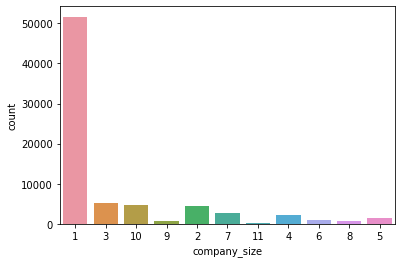

C:\Users\laugh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


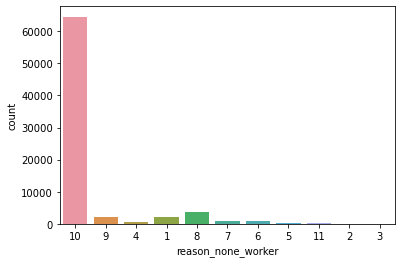

In [17]:
t3.company_size.replace(" ",str(1),inplace=True)
t3.company_size.replace("99",str(1),inplace=True)
t3.reason_none_worker.replace(" ",str(10),inplace=True)
t3.reason_none_worker.replace(str(99),str(10),inplace=True)
t3.reason_none_worker.replace(str(0),str(10),inplace=True)
t3
sb.countplot(t3.company_size);plt.show()
sb.countplot(t3.reason_none_worker);plt.show()


# model fit

In [68]:
from sklearn.model_selection import train_test_split
data=copy.deepcopy(t3)
target=data['real_income']
data=data.drop(columns =['income','real_income'])
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60388, 12) (15098, 12) (60388,) (15098,)


In [38]:
data

,wave,region,family_member,gender,education_level,marriage,religion,occupation,company_size,reason_none_worker,age,cpi_
0,1,3,1,2,2,2,1,6,1,10,65,74.413
1,14,4,3,1,5,1,2,0,1,9,79,99.086
2,8,2,3,1,6,3,1,5,1,10,45,91.815
3,7,4,5,1,3,1,1,6,1,10,64,89.850
4,13,4,2,1,2,1,2,0,1,10,77,97.645
...,...,...,...,...,...,...,...,...,...,...,...,...
78923,3,2,4,1,5,1,2,9,5,10,42,78.010
78924,2,2,4,1,5,1,1,5,2,10,34,76.081
78925,2,2,4,1,2,1,2,0,1,7,65,76.081
78926,14,7,1,2,3,2,2,0,1,10,82,99.086


## decision tree regressor

In [69]:
regr_1 = DecisionTreeRegressor(max_depth=10)
regr_2 = DecisionTreeRegressor(max_depth=11)
regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)

# Predict
y_pred1 = regr_1.predict(x_test)
y_pred2 = regr_2.predict(x_test)

print(round(regr_1.score(x_train, y_train), 4) * 100)
print(round(regr_1.score(x_test, y_test), 4) * 100)
print(round(regr_2.score(x_train, y_train), 4) * 100)
print(round(regr_2.score(x_test, y_test), 4) * 100)

66.89
62.339999999999996
69.12
61.69


## linear regression

56.98
58.39


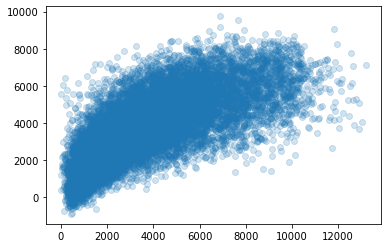

In [91]:
data=copy.deepcopy(t3)
target=data['real_income']
data=data.drop(columns =['income','real_income'])
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)


#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
lin_pred=linear_model.predict(x_test)
print(round(linear_model.score(x_train, y_train), 4) * 100)
print(round(linear_model.score(x_test, y_test), 4) * 100)

plt.scatter(y_test,lin_pred, alpha = 0.2)
plt.show()

# KNN

In [110]:
#scaling
import scipy.stats as stats
data=copy.deepcopy(t3)
target=data['real_income']
#target=target.astype(int)

data=data.astype(float)
data=data.drop(columns =['income','real_income'])
data = data.apply(stats.zscore)

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)
data

,wave,region,family_member,gender,education_level,marriage,religion,occupation,company_size,reason_none_worker,age,cpi_
0,-1.605409,-0.344714,-1.120985,1.498623,-1.480856,0.262053,-0.991242,0.559403,-0.525857,0.311857,0.368072,-1.734013
1,1.640925,0.140473,0.450670,-0.667279,0.345261,-0.633597,1.008835,-1.013448,-0.525857,-0.270376,1.224745,1.357377
2,0.142617,-0.829902,0.450670,-0.667279,0.953966,1.157703,-0.991242,0.297261,-0.525857,0.311857,-0.855746,0.446361
3,-0.107101,0.140473,2.022324,-0.667279,-0.872151,-0.633597,-0.991242,0.559403,-0.525857,0.311857,0.306881,0.200157
4,1.391207,0.140473,-0.335158,-0.667279,-1.480856,-0.633597,1.008835,-1.013448,-0.525857,0.311857,1.102363,1.176827
...,...,...,...,...,...,...,...,...,...,...,...,...
78923,-1.105973,-0.829902,1.236497,-0.667279,0.345261,-0.633597,1.008835,1.345829,0.958575,0.311857,-1.039319,-1.283329
78924,-1.355691,-0.829902,1.236497,-0.667279,0.345261,-0.633597,-0.991242,0.297261,-0.154749,0.311857,-1.528846,-1.525022
78925,-1.355691,-0.829902,1.236497,-0.667279,-1.480856,-0.633597,1.008835,-1.013448,-0.525857,-1.434842,0.368072,-1.525022
78926,1.640925,1.596037,-1.120985,1.498623,-0.872151,0.262053,1.008835,-1.013448,-0.525857,0.311857,1.408317,1.357377


k =  7
0.6384329401880138
k =  9
0.6423674116162826
k =  11
0.6442899114584055
k =  13
0.6434368784650216
k =  15
0.6437527683827656
k =  17
0.6430129557279602
k =  19
0.6427287583776479
k =  21
0.6417730770328086


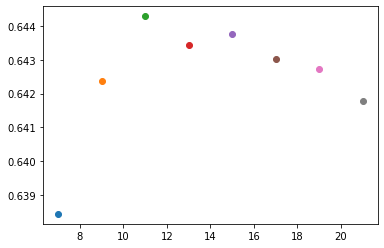

In [111]:
knr= KNeighborsRegressor(weights = "distance")

for i in range(7,23,2):
    knr.n_neighbors = i
    knr.fit(x_train,y_train)
    print('k = ', i)
    score=knr.score(x_test,y_test)
    print(score)
    plt.scatter(i,score)
plt.show()